In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score 

In [7]:
data=pd.read_csv('/config/workspace/Dataset/diabetes.csv')

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.shape

(768, 9)

In [6]:
no_of_1=data[data['Outcome']==1]
no_of_1.shape

(268, 9)

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())

In [12]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


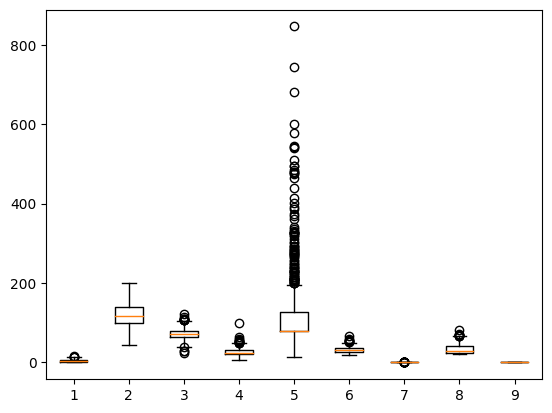

In [13]:
plt.boxplot(data)
plt.show()

<Axes: >

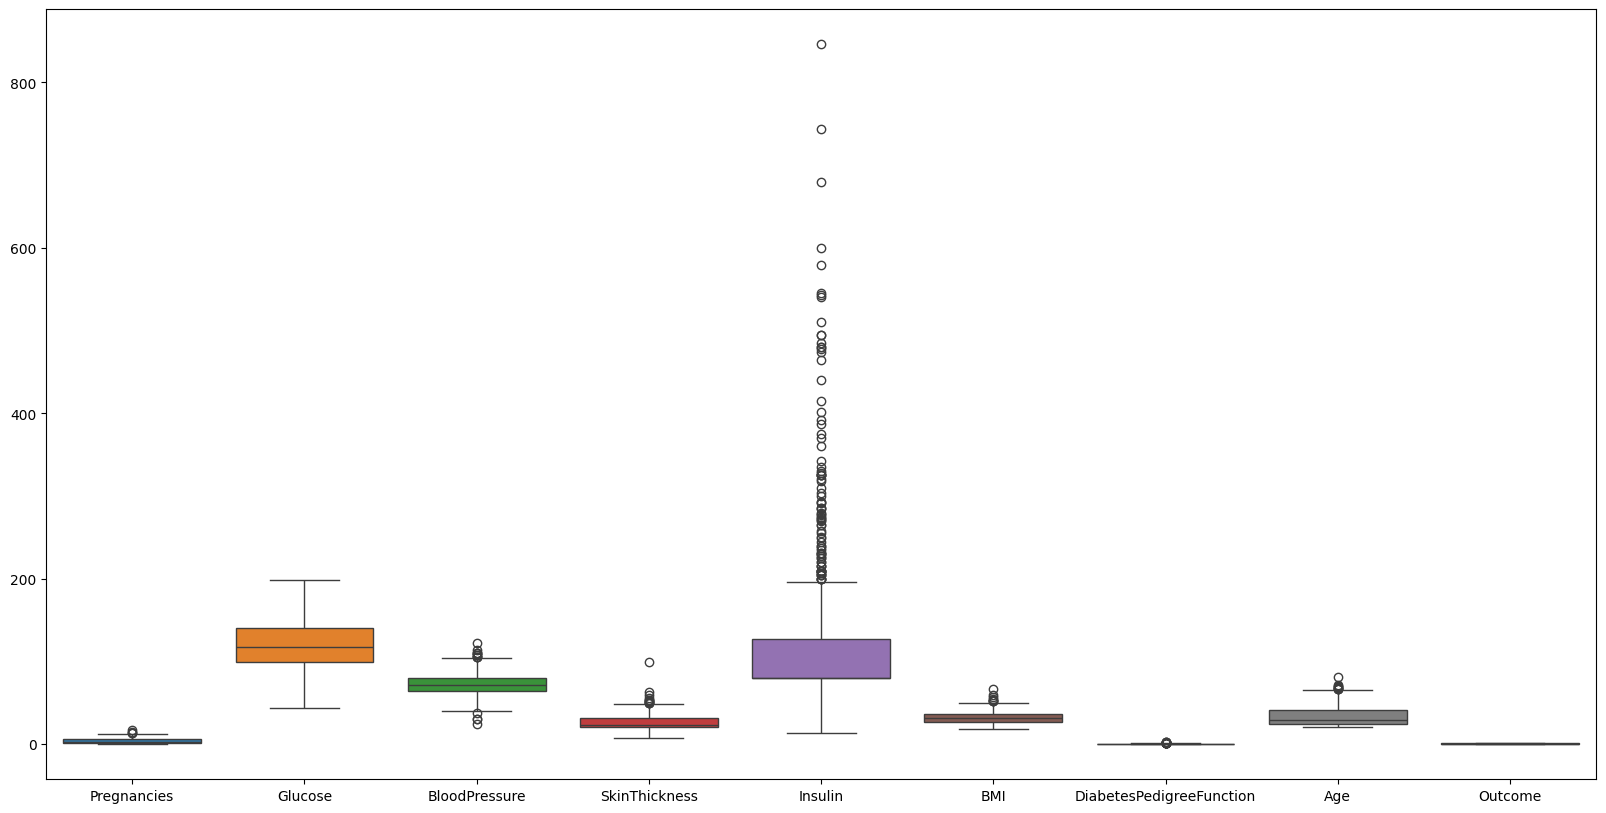

In [14]:
plt.figure(figsize=(20,10))
sns.boxplot(data)

In [15]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((576, 8), (192, 8), (576,), (192,))

In [17]:
import pickle

In [18]:
def scaler_stander(X_train,X_test):
    scaler=StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    X_test_scaled=scaler.transform(X_test)

    file=open('/config/workspace/Model/standarded_scaler.pkl','wb')
    pickle.dump(scaler,file)

    return X_train_scaled,X_test_scaled

In [19]:
X_train_scaled, X_test_scaled = scaler_stander(X_train, X_test)

In [20]:
X_train_scaled, X_test_scaled

(array([[ 1.50755225, -1.09947934, -0.89942504, ..., -1.45561965,
         -0.98325882, -0.04863985],
        [-0.82986389, -0.1331471 , -1.23618124, ...,  0.09272955,
         -0.62493647, -0.88246592],
        [-1.12204091, -1.03283573,  0.61597784, ..., -0.03629955,
          0.39884168, -0.5489355 ],
        ...,
        [ 0.04666716, -0.93287033, -0.64685789, ..., -1.14021518,
         -0.96519215, -1.04923114],
        [ 2.09190629, -1.23276654,  0.11084355, ..., -0.36604058,
         -0.5075031 ,  0.11812536],
        [ 0.33884418,  0.46664532,  0.78435594, ..., -0.09470985,
          0.51627505,  2.953134  ]]),
 array([[-0.82986389,  2.56591881,  0.27922165, ...,  1.46903995,
          2.78665365, -0.96584853],
        [-0.53768687, -0.49968691,  0.11084355, ...,  0.13573925,
         -0.19434743, -0.88246592],
        [ 0.04666716, -1.53266275, -0.89942504, ...,  0.19308552,
         -0.23349189, -0.71570071],
        ...,
        [-0.82986389, -0.43304331, -1.06780314, ..., -

In [21]:
log_reg=LogisticRegression()
log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

In [22]:
## Hyperparameter Tuning
## GridSearch CV
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}


In [23]:
logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds

clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [24]:
clf.best_score_

0.763793103448276

In [25]:
y_pred = clf.predict(X_test_scaled)

In [26]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[117,  13],
       [ 26,  36]])

In [27]:
accuracy_score(y_test,y_pred)

0.796875

In [28]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [29]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.796875

In [30]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9

In [31]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.8181818181818182

In [32]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8571428571428572

In [ ]:
file = open('/config/workspace/Model/modelForPrediction.pkl','wb')
pickle.dump(log_reg,file)
file.close()